In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Employee_Data.csv')

data.shape

(1470, 35)

In [4]:
pd.set_option('max_columns',35)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AvgTimeSpanAtCompanies', ylabel='Density'>

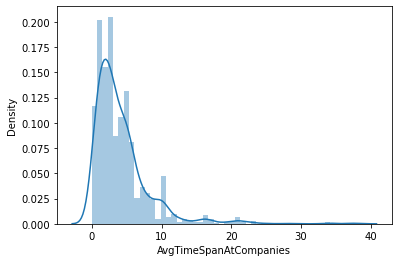

In [6]:
# lets calculate the average time span of employees in a company
data['AvgTimeSpanAtCompanies'] = (data['TotalWorkingYears'])/(data['NumCompaniesWorked'] + 1)

sns.distplot(data['AvgTimeSpanAtCompanies'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OverallSatisfaction', ylabel='Density'>

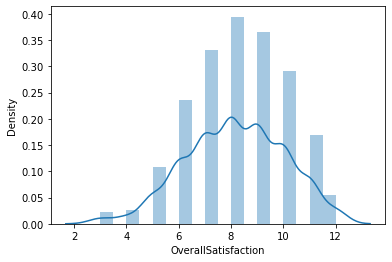

In [7]:
data['OverallSatisfaction'] = (data['EnvironmentSatisfaction'] + data['RelationshipSatisfaction'] + data['JobSatisfaction'])

sns.distplot(data['OverallSatisfaction'])

In [8]:
# lets Bin the Age into Categories

# lets create a Function for Categorization of age
def age_cat(x):
    if x < 40:
        return 'Young'
    else:
        return 'Old'
    
# lets apply the function created
data['Age'] = data['Age'].apply(age_cat)

# lets check the Values After Binning the Values
data['Age'].value_counts()

Young    948
Old      522
Name: Age, dtype: int64

In [9]:
# lets Bin the Distance from Home also

# lets Create a Function for Categoriation of Distance from Home
def dist_cat(x):
    if x <= 2:
        return "Near"
    elif x > 2 and x < 5:
        return "Far"
    else:
        return "Very Far"
        
# lets apply the Function
data['DistanceFromHome'] = data['DistanceFromHome'].apply(dist_cat)

# lets check the values
data['DistanceFromHome'].value_counts()

Very Far    903
Near        419
Far         148
Name: DistanceFromHome, dtype: int64

In [10]:
# lets Bin the Total Working Years also

# lets Create a Function for Categoriation of Distance from Home
def work_cat(x):
    if x <= 2:
        return "Fresher"
    else:
        return "Professional"
        
# lets apply the Function
data['TotalWorkingYears'] = data['TotalWorkingYears'].apply(work_cat)

# lets check the values
data['TotalWorkingYears'].value_counts()

Professional    1347
Fresher          123
Name: TotalWorkingYears, dtype: int64

In [11]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgTimeSpanAtCompanies,OverallSatisfaction
0,Old,Yes,Travel_Rarely,1102,Sales,Near,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,...,8,Y,Yes,11,3,1,80,0,Professional,0,1,6,4,0,5,0.888889,7
1,Old,No,Travel_Frequently,279,Research & Development,Very Far,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,...,1,Y,No,23,4,4,80,1,Professional,3,3,10,7,1,7,5.000000,9
2,Young,Yes,Travel_Rarely,1373,Research & Development,Near,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,...,6,Y,Yes,15,3,2,80,0,Professional,3,3,0,0,0,0,1.000000,9
3,Young,No,Travel_Frequently,1392,Research & Development,Far,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,...,1,Y,Yes,11,3,3,80,0,Professional,3,3,8,7,3,0,4.000000,10
4,Young,No,Travel_Rarely,591,Research & Development,Near,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,...,9,Y,No,12,3,4,80,1,Professional,3,3,2,2,2,2,0.600000,7
